# Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

## Описание проекта и данных: 

**Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.**

**Файл hypothesis.csv**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже  проверка гипотезы.


**Файл orders.csv**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Файл visitors.csv**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### Импорт библиотек и чтение файлов:

In [1]:
# Импорт библиотек
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
from pandas.plotting import register_matplotlib_converters

import numpy as np

import math as mt
from math import ceil
from math import factorial

import datetime as dt
from datetime import datetime, timedelta

from scipy import stats as st

In [2]:
# Чтение файлов:
try:
    hypothesis = pd.read_csv(
        '/home/saxofon/Документы/jupdata/hypothesis.csv')
    orders = pd.read_csv(
        '/home/saxofon/Документы/jupdata/orders.csv')
    visitors = pd.read_csv(
        '/home/saxofon/Документы/jupdata/visitors.csv')
except:
    hypothesis = pd.read_csv(
        '/datasets/hypothesis.csv')
    orders = pd.read_csv(
        '/datasets/orders.csv')
    visitors = pd.read_csv(
        '/datasets/visitors.csv')

## Приоритизация гипотез:

- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

### Применим фреймворк ICE и RICE:

Изучим гипотезы, прежде чем применять фреймворк:

In [3]:
# Зададим опцию для того чтобы поместилась вся информация
pd.options.display.max_colwidth = 210

hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


В таблице всего 8 гипотез, что достаточно немного для анализа нашего проекта. Данные нужных типов, таблица готова к анализу:

In [5]:
# Считаем ICE:
hypothesis['ICE'] = (hypothesis['Impact'] *
                     hypothesis['Confidence']) / hypothesis['Efforts']
ice = hypothesis[['Hypothesis', 'ICE']]

display(ice.sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


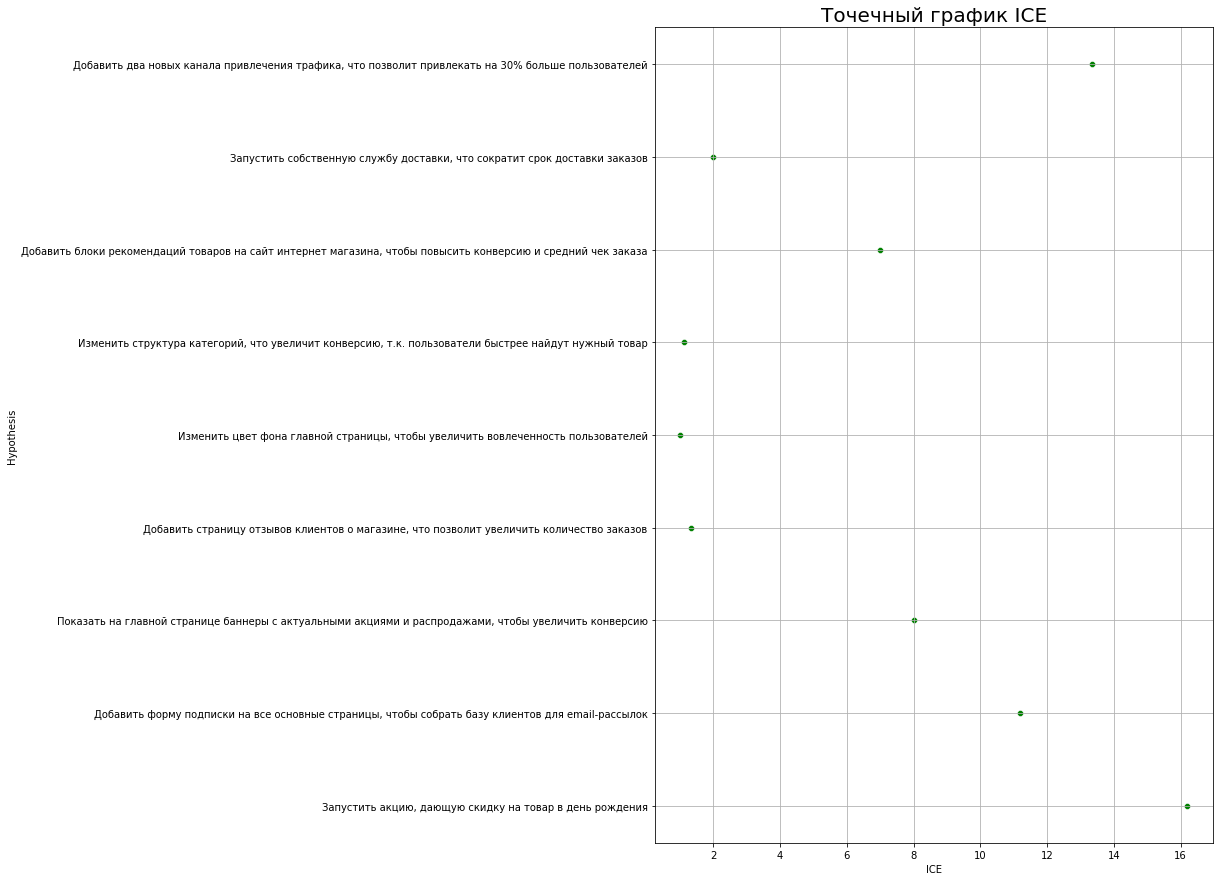

In [6]:
plt.figure(figsize=(10, 15))
plt.grid()
sns.scatterplot(data=ice, x='ICE', y='Hypothesis', color='green')
plt.title('Точечный график ICE', fontsize=20)

In [7]:
# Cчитаем RICE:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] *
                      hypothesis['Confidence']) / hypothesis['Efforts']
rice = hypothesis[['Hypothesis', 'RICE']]

display(rice.sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


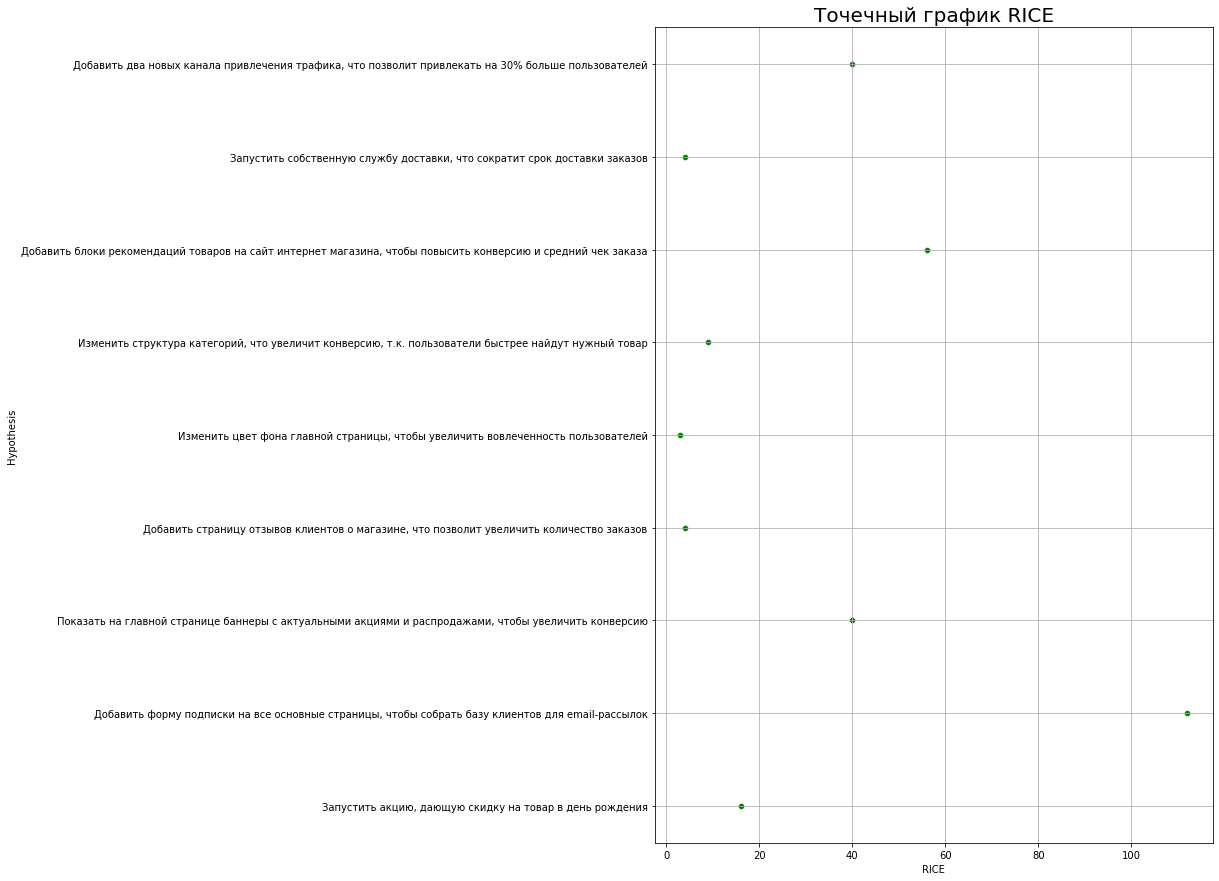

In [8]:
plt.figure(figsize=(10, 15))
plt.grid()
sns.scatterplot(data=rice, x='RICE', y='Hypothesis', color='green')
plt.title('Точечный график RICE', fontsize=20)

In [9]:
ice_rice = hypothesis[['Hypothesis', 'ICE', 'RICE']]

display(ice_rice.sort_values(by='RICE', ascending=False))

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


При подсчете ICE можно заметить:
- На первых 3х местах гипотезы: 8, 0 и 7
При подсчете RICE можно заметить:
- На первых 3х местах гипотезы: 7, 2 и 0
- Гипотезы под номером "8" вовсе нет в тройке лидеров, остальные же сильно сместились в рейтинге, и появилась гипотеза "2"

При подсчете ICE мы не учитываем параметр "Reach", иначе говоря: скольких пользователей затронут изменения, которые мы хотим внести, потому результаты так сильно разнятся. У гипотез 7 и 2 к примеру, этот параметр очень высок, и игнорировать его мы не можем в контексте данного исследования.

## Анализ A/B-теста:

### Предобратока таблиц: orders и visitors

Прежде чем проводить анализ, убедимся что все данные соответсвуют нужным типам, и в них нет пропусков:

In [10]:
display(orders.head(5))
print()
display(visitors.head(5))
print()
display(orders.info())
print()
display(visitors.info())
print("\nЧисло дубликатов visitors:", visitors.duplicated().sum())
print("Число дубликатов orders:", orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None


Число дубликатов visitors: 0
Число дубликатов orders: 0


---

Сменим тип данных в столбцах "date"

In [11]:
# Сменим тип данных:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

display(orders.info())
print()
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

---

In [12]:
# Проверим таблицу на количество пользователей и совершённых ими заказов:
ordersA = orders[orders['group'] == 'A']
ordersB = orders[orders['group'] == 'B']
visitorsA = visitors[visitors['group'] == 'A']['visitors']
visitorsB = visitors[visitors['group'] == 'B']['visitors']
print(
    f'Кол-во посетителей в группе А:{visitorsA.sum()}\nКол-Во посетителей в группе В:{visitorsB.sum()}'
)
print(
    f'Кол-во заказов в группе А:{len(ordersA)}\nКол-Во заказов в группе В:{len(ordersB)}'
)

Кол-во посетителей в группе А:18736
Кол-Во посетителей в группе В:18916
Кол-во заказов в группе А:557
Кол-Во заказов в группе В:640


In [13]:
double = orders.groupby(['visitorId', 'group']).size().unstack()
print(
    f'Количество пользователей совершивших покупки по группам: \n{double.count()}'
)
print(
    f'Количество пользователей, которые попадают в обе группы: {len(double.dropna())}'
)

Количество пользователей совершивших покупки по группам: 
group
A    503
B    586
dtype: int64
Количество пользователей, которые попадают в обе группы: 58


---

Установим нулевую гипотезу:
- Между группами "А" и "В" нет статистически значимой разницы

Соответственно, альтернативная гипотеза будет звучать так:
- Между группами "А" и "В" есть статистически значимая разница

In [14]:
# Проведём тест Манна-Уитни, посмотрим как статистически значимы различия в выборках:
alpha = 0.05
visitors_results = st.mannwhitneyu(visitorsA, visitorsB)

print(f'P-value: {visitors_results.pvalue}')
if visitors_results.pvalue < alpha:
    print(
        'Отвергаем нулевую гипотезу: между группами "А" и "В" есть статистически значимая разница\n'
    )
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы "А" и "В" разными\n'
    )

P-value: 0.7301376549390499
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы "А" и "В" разными



Некоторые выводы по группам:
- Мы обнаружили попадание пользователей в выборки "А" и "В" одновременно, равное 58 шт, что составляет чуть более 4% от общих транзакций, потому оставим этих пользователей, и не будем их трогать.
- С записью и распределением данных всё в порядке.

### График кумулятивной выручки по группам:

Прежде чем начинать считать метрики, убедимся что крайние даты совпадают в обоих фреймах:

In [15]:
print(
    f'Начальная дата visitors: {visitors["date"].min()}, конечная дата {visitors["date"].max()}'
)
print(
    f'Начальная дата orders: {orders["date"].min()}, конечная дата {orders["date"].max()}'
)

Начальная дата visitors: 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00
Начальная дата orders: 2019-08-01 00:00:00, конечная дата 2019-08-31 00:00:00


Даты сходятся, всё в порядке.

---

In [16]:
# Cоздаем массив уникальных пар значений дат и групп теста:
datesGroups = orders[['date', 'group']].drop_duplicates()

# Получаем агрегированные кумулятивные по дням данные о заказах:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders[
        'group'] == x['group'])].agg({
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum'
        }),
    axis=1).sort_values(by=['date', 'group'])

# Получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors[
        'group'] == x['group'])].agg({
            'date': 'max',
            'group': 'max',
            'visitors': 'sum'
        }),
    axis=1).sort_values(by=['date', 'group'])

# Объединяем кумулятивные данные в одной таблице и присваиваем её столбцам понятные названия:
cumulativeData = ordersAggregated.merge(visitorsAggregated,
                                        left_on=['date', 'group'],
                                        right_on=['date', 'group'])
cumulativeData.columns = [
    'date', 'group', 'orders', 'buyers', 'revenue', 'visitors'
]

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


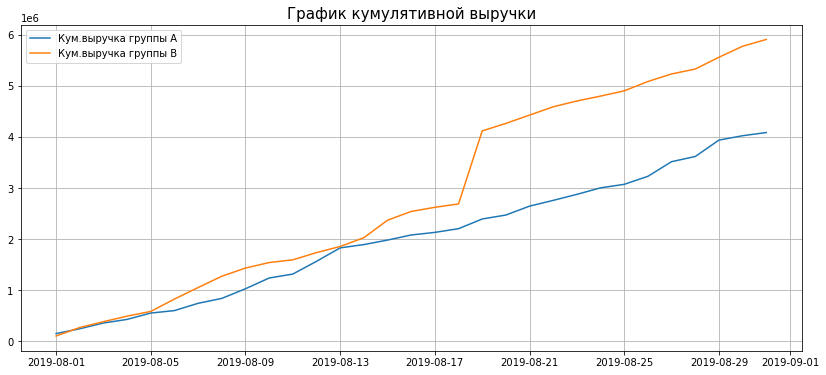

In [17]:
# Присваиваем переменные группам
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][[
    'date', 'revenue', 'orders'
]]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][[
    'date', 'revenue', 'orders'
]]

# Строим график
plt.figure(figsize=(14, 6))
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'],
         label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'],
         label='Кум.выручка группы B')
plt.grid()
plt.legend()
plt.title('График кумулятивной выручки', fontsize=15);

По графикам однозначно можно сделать выводы:
- В первой половине месяца обе группы были практически идентичны.
- Ближе к 19 августа группа "В" сильно выросла, относительно группы "А".
- К концу месяца, лидером осталась группа "B".

### График кумулятивного среднего чека по группам:

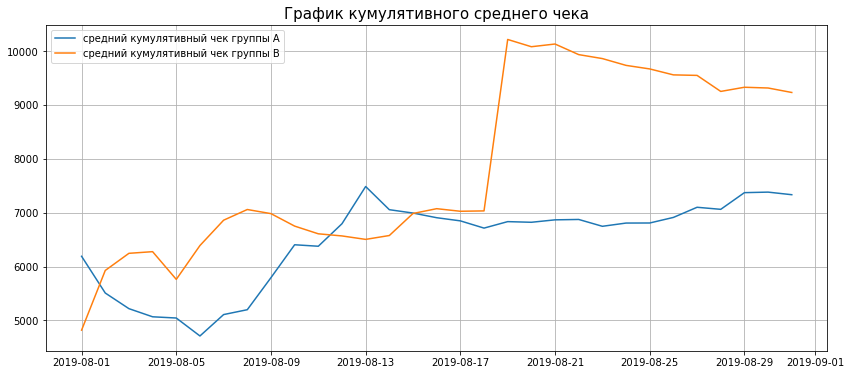

In [18]:
plt.figure(figsize=(14, 6))
plt.grid()
plt.plot(cumulativeRevenueA['date'],
         cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
         label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'],
         cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
         label='средний кумулятивный чек группы B')
plt.legend()
plt.title('График кумулятивного среднего чека', fontsize=15)

Некоторые выводы:
- В первой половине месяца стабильно лидирует группа "В"
- Ближе к 13 августа, группа "А" выбилась немного вперёд.
- 18 - 19 августа группа "В" прочно выбилась вперед, нужно изучить что произошло в этот промежуток времени.

boxplot для 19 числа:


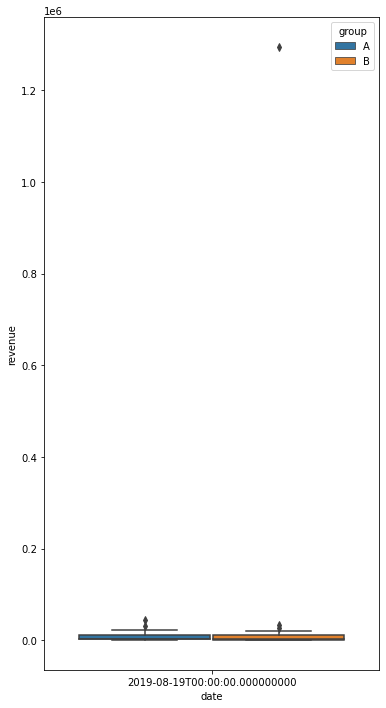

In [19]:
date_19 = orders.query('date == "2019-08-19"')
date_18 = orders.query('date == "2019-08-18"')

print('boxplot для 19 числа:')
plt.figure(figsize=(6, 12))
sns.boxplot(x='date', y="revenue", data=date_19, hue="group")

boxplot для 19 числа, с ylim:


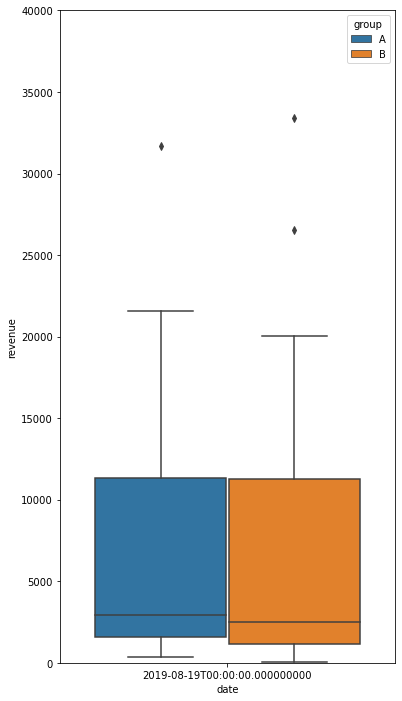

In [20]:
print('boxplot для 19 числа, с ylim:')
plt.figure(figsize=(6, 12))
plt.ylim(0, 40000)
sns.boxplot(x='date', y="revenue", data=date_19, hue="group")

boxplot для 18 числа:


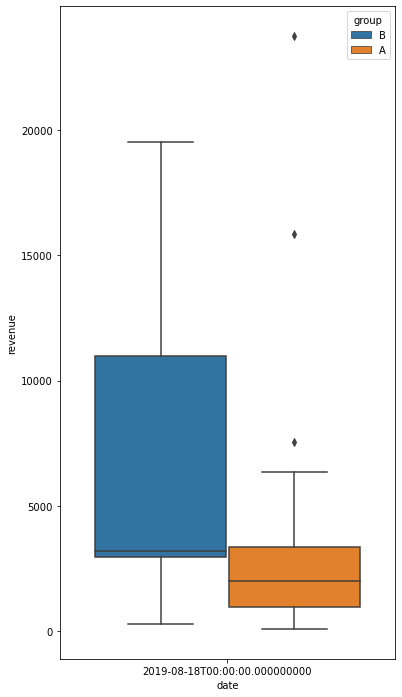

In [21]:
print('boxplot для 18 числа:')
plt.figure(figsize=(6, 12))
sns.boxplot(x='date', y="revenue", data=date_18, hue="group");

In [22]:
print('\nТаблица для 18 числа:')
display(date_18[['revenue', 'group']].sort_values(
    by='revenue',
    ascending=False).head(10).style.background_gradient(axis=None))
print('Медиана для групп А и В 18 числа:', date_18['revenue'].median())

print('\nТаблица для 19 числа:')
display(date_19[['revenue', 'group']].sort_values(
    by='revenue',
    ascending=False).head(10).style.background_gradient(axis=None))
print('Медиана для групп А и В 19 числа:', date_19['revenue'].median())


Таблица для 18 числа:


,revenue,group
294,23750,A
267,19538,B
229,15850,A
266,14400,B
263,10970,B
268,10450,B
249,7555,A
295,6350,A
280,3354,A
251,3190,B


Медиана для групп А и В 18 числа: 2411.0

Таблица для 19 числа:


,revenue,group
425,1294500,B
530,43990,A
527,33405,B
421,31680,A
461,26550,B
525,21550,A
368,20026,B
366,16770,A
463,16480,B
531,13390,A


Медиана для групп А и В 19 числа: 2630.0


Промежуточные выводы:
- 19 августа был один аномально большой заказ №425 суммой в 1.29 млн, который скорее всего и повлиял на итоговые результаты теста.
- В среднем же большие заказы можно считать заказы от 30.000.
- Медианой суммы заказа можно считать 2500.

### График относительного изменения кумулятивного среднего чека группы B к группе A:

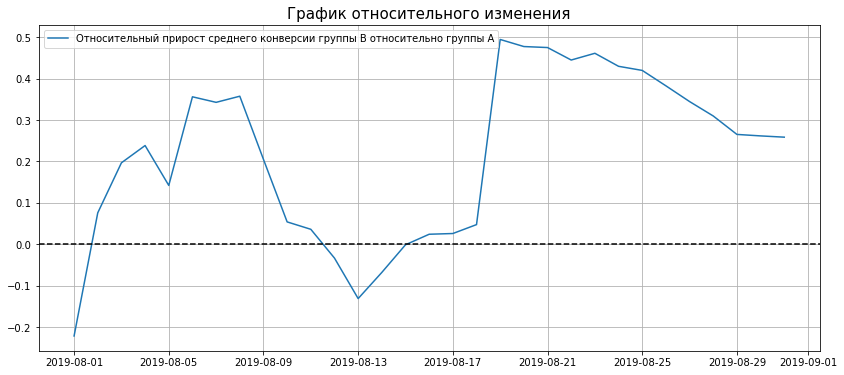

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,
                                                   left_on='date',
                                                   right_on='date',
                                                   how='left',
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(14, 6))
plt.plot(
    mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB'] /
                                      mergedCumulativeRevenue['ordersB']) /
    (mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])
    - 1,
    label="Относительный прирост среднего конверсии группы B относительно группы A")

plt.grid()
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения', fontsize=15)

Для наглядности построили график, видно, что только 4 дня группа "А" обгоняла по средней конверсии группу "В".

### График кумулятивной конверсии по группам:

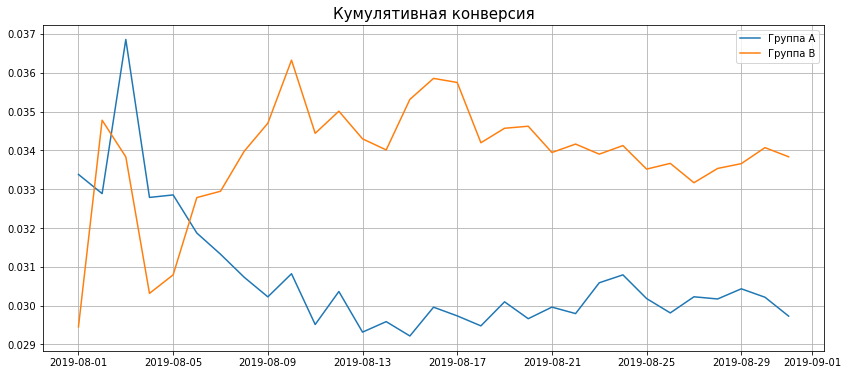

In [24]:
cumulativeData[
    'conversion'] = cumulativeData['orders'] / cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(14, 6))
plt.grid()
plt.plot(cumulativeDataA['date'],
         cumulativeDataA['conversion'],
         label='Группа A')
plt.plot(cumulativeDataB['date'],
         cumulativeDataB['conversion'],
         label='Группа B')
plt.legend()
plt.title('Кумулятивная конверсия', fontsize=15)

Некоторые выводы:
- Кумулятивная конверсия группы "В" также выше, чем группы "А".
- В начале теста бы момент, когда группа "А" вырвалась вперёд, но больше 80% времени теста лучше группа "В".

### График относительного изменения кумулятивной конверсии группы B к группе A:

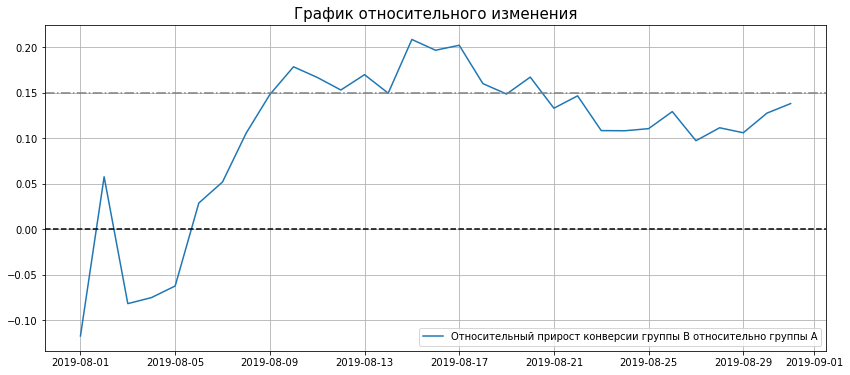

In [25]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'])

plt.figure(figsize=(14, 6))
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB'] /
    mergedCumulativeConversions['conversionA'] - 1,
    label="Относительный прирост конверсии группы B относительно группы A")

plt.legend()
plt.grid()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='gray', linestyle='-.')
plt.title('График относительного изменения', fontsize=15)

Некоторые выводы:
- Кумулятивная конверсия, в отличии от средней более постоянна, и явно выбивается вперёд, относительно группы "А".
- На графике наглядно видно, что только 3 дня группа "В" отставала от конверсии группы "А".
- После 21.08 можно заметить небольшую стабилизацию результатов теста.

### Точечный график количества заказов по пользователям:

In [26]:
# Освежим в памяти, как выглядит таблица:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [27]:
orderUsr = orders.groupby('visitorId', as_index=False).agg(
    {'transactionId': pd.Series.nunique})
orderUsr.columns = ['userID', 'orders']
orderUsr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   userID  1031 non-null   int64
 1   orders  1031 non-null   int64
dtypes: int64(2)
memory usage: 16.2 KB


In [28]:
print('Процент пользователей, которые сделали больше 2 покупок:',
      (len(orderUsr.query('orders >= 2'))) / (len(orderUsr)) * 100)

Процент пользователей, которые сделали больше 2 покупок: 9.117361784675072


In [29]:
print('Процент пользователей, которые сделали 1 покупку:',
      (len(orderUsr.query('orders == 1'))) / (len(orderUsr)) * 100)

Процент пользователей, которые сделали 1 покупку: 90.88263821532493


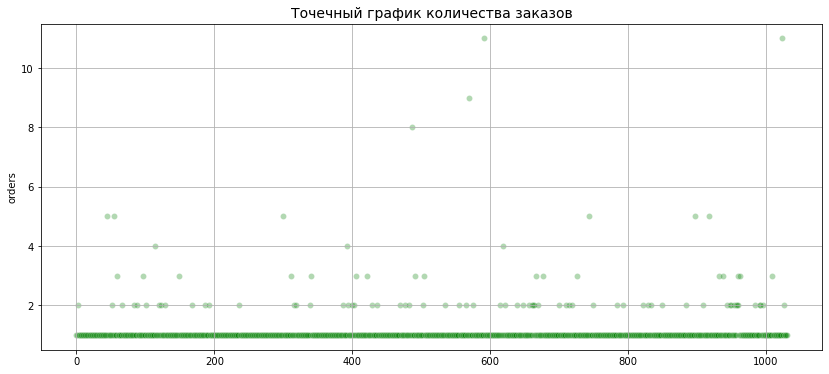

In [30]:
scoope_orders = pd.Series(range(0, len(orderUsr)))

plt.figure(figsize=(14, 6))
plt.grid()
sns.scatterplot(data=orderUsr,
                x=scoope_orders,
                y='orders',
                color='green',
                alpha=0.3)
plt.title('Точечный график количества заказов', fontsize=14)

Благодаря графику можно сделать некоторые выводы:
- Большинство пользователей делает всего 1 заказ.
- От 2 заказов и более делает очень малое количество людей.
- Возможно, это связано с малой вовлеченностью покупателей для повторных покупок, и по всей видимости, услуги распространяются в форме подписки, потому процент повторных подписок такой маленький, ведь мало кто из нас в месяц повторно захочет купить вторую подписку при действующей первой.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей:

In [31]:
print(
    f'95 перцинтиль пользователей: {int(np.percentile(orderUsr["orders"], [95]))}\
    \n99 перцентиль пользоватлей: {int(np.percentile(orderUsr["orders"], [99]))}'
)

95 перцинтиль пользователей: 2    
99 перцентиль пользоватлей: 4


Иначе говоря, всего 5% пользователей делает 2 и более заказов, а 1% делают больше 4 заказов.

In [32]:
print('Процент пользователей, которые сделали больше 2 покупок:',
      (len(orderUsr.query('orders >= 2'))) / (len(orderUsr)) * 100)
print('Процент пользователей, которые сделали 1 покупку:',
      (len(orderUsr.query('orders == 1'))) / (len(orderUsr)) * 100)

Процент пользователей, которые сделали больше 2 покупок: 9.117361784675072
Процент пользователей, которые сделали 1 покупку: 90.88263821532493


Из наших расчётов, можно заключить, что: **средний пользователей делает от 1 до 2 покупок, всё что выше, можно считать за аномалию.**

### Точечный график стоимостей заказов:

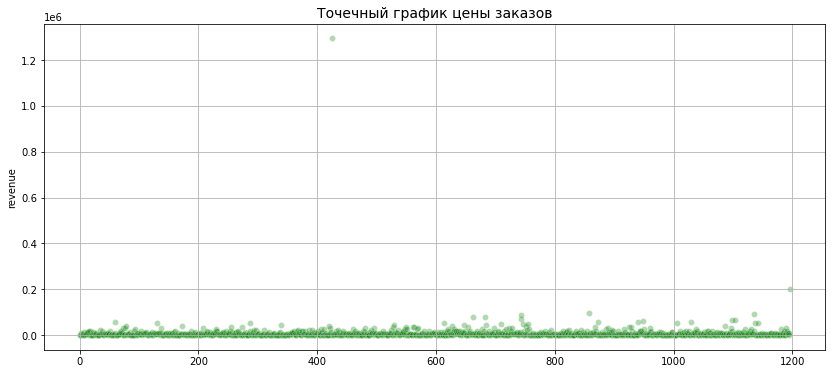

In [33]:
scoope_revenue = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(14, 6))
plt.grid()
sns.scatterplot(data=orders,
                x=scoope_revenue,
                y='revenue',
                color='green',
                alpha=0.3)
plt.title('Точечный график цены заказов', fontsize=14)

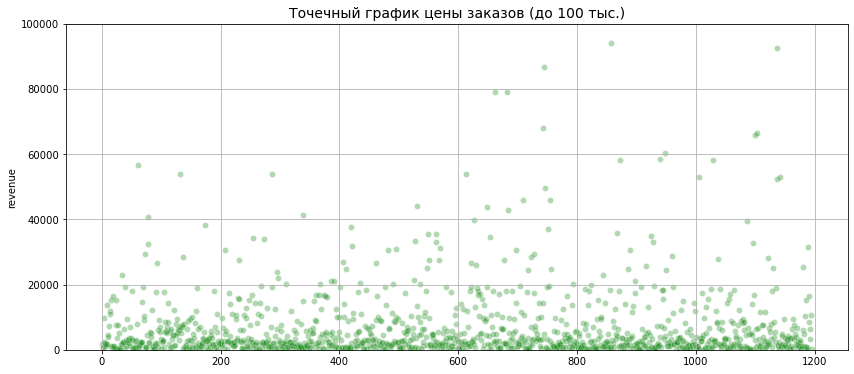

In [34]:
# Посторим график до 100.тыс
plt.figure(figsize=(14, 6))
plt.grid()
sns.scatterplot(data=orders,
                x=scoope_revenue,
                y='revenue',
                color='green',
                alpha=0.3)
plt.ylim(0, 100000)
plt.title('Точечный график цены заказов (до 100 тыс.)', fontsize=14)

Выводы по графику:
- Большинство пользователей совершают покупки ценой до 20.000.
- От 20 и до 60 тыс. совершают покупки в разы меньше пользователей.
- На самом первом графике видно заказ суммой в 1.2 млн, и ещё один выбивающийся заказ суммой в 200 тыс.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов:

In [35]:
print(
    f'95 перцинтиль пользователей: {int(np.percentile(orders["revenue"], [95]))}\
    \n99 перцентиль пользоватлей: {int(np.percentile(orders["revenue"], [99]))}'
)

95 перцинтиль пользователей: 28000    
99 перцентиль пользоватлей: 58233


In [36]:
print('Заказов меньше 10:', len(orders.query('revenue < 10')))

Заказов меньше 10: 0


Исходя из исследования, можно установить сумму в 58000 границей для аномальных заказов

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным:

In [37]:
# Зададим нужные переменные и добавим для рассчёта столбцы:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {
            'date': 'max',
            'visitorsPerDateA': 'sum'
        }),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {
            'date': 'max',
            'visitorsPerDateB': 'sum'
        }),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (orders[orders['group'] == 'A'][[
    'date', 'transactionId', 'visitorId', 'revenue'
]].groupby('date', as_index=False).agg({
    'transactionId': pd.Series.nunique,
    'revenue': 'sum'
}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {
            'date': 'max',
            'ordersPerDateA': 'sum',
            'revenuePerDateA': 'sum'
        }),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (orders[orders['group'] == 'B'][[
    'date', 'transactionId', 'visitorId', 'revenue'
]].groupby('date', as_index=False).agg({
    'transactionId': pd.Series.nunique,
    'revenue': 'sum'
}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {
            'date': 'max',
            'ordersPerDateB': 'sum',
            'revenuePerDateB': 'sum'
        }),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [38]:
# выполним слияние таблиц:
df = (ordersADaily.merge(
    ordersBDaily, left_on='date', right_on='date',
    how='left').merge(ordersACummulative,
                      left_on='date',
                      right_on='date',
                      how='left').merge(ordersBCummulative,
                                        left_on='date',
                                        right_on='date',
                                        how='left').merge(
                                            visitorsADaily,
                                            left_on='date',
                                            right_on='date',
                                            how='left').merge(
                                                visitorsBDaily,
                                                left_on='date',
                                                right_on='date',
                                                how='left').merge(
                                                    visitorsACummulative,
                                                    left_on='date',
                                                    right_on='date',
                                                    how='left').merge(
                                                        visitorsBCummulative,
                                                        left_on='date',
                                                        right_on='date',
                                                        how='left'))

df.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [39]:
# Создадим переменные, в них для пользователей которые совершили хоть раз заказ, укажем количество заказов.
ordersByUsersA = (orders[orders['group'] == 'A'].groupby(
    'visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby(
    'visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

In [40]:
# Объявим переменные, в них будут пользователи из разных групп, которым будет соответствовать количество совершенных
# заказов, это нужно чтобы подготовить выборки к анализу критерием Манна-Уитни

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(df['visitorsPerDateA'].sum() -
                            len(ordersByUsersA['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(df['visitorsPerDateB'].sum() -
                            len(ordersByUsersB['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

---

Пороговое значение (alpha) возьмём в 5%, установим нулевую гипотезу:
- Cтатистически значимых различий в конверсии между группами нет.

Альтернативная гипотеза:
- Статистически значимые различия в конверсии между группами есть.

In [41]:
alpha = .05
results = st.mannwhitneyu(sampleA, sampleB)

print('p-value:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

if results.pvalue < alpha:
    print(
        'Отвергаем нулевую гипотезу: между группами "А" и "В" есть статистически значимая разница.'
    )
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы "А" и "В" разными.'
    )

print('Относительный показатель группы "В", к группе "А":', "{0:.3f}".format(
    (sampleB.mean() / sampleA.mean() - 1)))

p-value: 0.017
Отвергаем нулевую гипотезу: между группами "А" и "В" есть статистически значимая разница.
Относительный показатель группы "В", к группе "А": 0.138


**Вывод:**
- Статистически значимые различия в конверсии между группами есть, таким образом, мы *отвергаем* нулевую гипотезу.
- Группа "В" превосходит группу "А" на 13.8%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным:

Пороговое значение (alpha) возьмём в 5%, установим нулевую гипотезу:
- Статистически значимых различий в среднем чеке между группами нет.

Альтернативная гипотеза:
- Статистически значимые различия в среднем чеке между группами есть.

In [42]:
mean_results = st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
                               orders[orders['group'] == 'B']['revenue'])

print(
    'p-value:', '{0:.3f}'.format(
        st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'],
                        orders[orders['group'] == 'B']['revenue'])[1]))

if mean_results.pvalue < alpha:
    print(
        'Отвергаем нулевую гипотезу: между группами "А" и "В" есть статистически значимая разница.'
    )
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы "А" и "В" разными.'
    )

print(
    'Относительный показатель среднего чека группы "В", к группе "А":',
    '{0:.3f}'.format(orders[orders['group'] == 'B']['revenue'].mean() /
                     orders[orders['group'] == 'A']['revenue'].mean() - 1))

p-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы "А" и "В" разными.
Относительный показатель среднего чека группы "В", к группе "А": 0.259


**Вывод:**
- Статистически значимых различий в среднем чеке между группами нет, таким образом мы *подтверждаем* нулевую гипотезу.
- Несмотря на то, что различий в среднем чеке между группами нет, средний чек группы "В" выше группы "А" на 25.9%.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным:

Исходя из прошлого анализа, пользователи которые сделали больше 2х заказов, и на сумму дороже 58000, не должны попасть в подборку, сделаем срез на основе этих данных.

In [48]:
borders_revenue = 58000
borders_orders = 2

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > borders_orders]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > borders_orders]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[
    orders['revenue'] > borders_revenue]['visitorId']
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders],
                           axis=0).drop_duplicates().sort_values())

print(
    '"Ненормальных" пользователей:', abnormalUsers.shape[0],
    f'\nВ процентах: {round(abnormalUsers.shape[0] / len(orderUsr["orders"]) * 100)}%'
)

"Ненормальных" пользователей: 31 
В процентах: 3%


In [49]:
# "Отфильтруем" подборку
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[np.logical_not(
            ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(df['visitorsPerDateA'].sum() -
                            len(ordersByUsersA['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[np.logical_not(
            ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(
            0,
            index=np.arange(df['visitorsPerDateB'].sum() -
                            len(ordersByUsersB['orders'])),
            name='orders',
        ),
    ],
    axis=0,
)

---

Пороговое значение (alpha) возьмём в 5%, установим нулевую гипотезу:
- Статистически значимых различий в конверсии между очищенных групп нет.

Альтернативная гипотеза:
- Статистически значимые различия в конверсии между очищенными группами есть.

In [50]:
filtred_results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-value:',
      "{0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

if filtred_results.pvalue < alpha:
    print(
        'Отвергаем нулевую гипотезу: между группами "А" и "В" есть статистически значимая разница\n'
    )
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы "А" и "В" разными\n'
    )

print('Относительный показатель группы "В", к группе "А":', "{0:.3f}".format(
    (sampleBFiltered.mean() / sampleAFiltered.mean() - 1)))

p-value: 0.010
Отвергаем нулевую гипотезу: между группами "А" и "В" есть статистически значимая разница

Относительный показатель группы "В", к группе "А": 0.174


**Выводы по очищенным данным:**
- Статистически значимые различия в конверсии между очищенными группами есть. Таким образом, мы *отвергаем* нулевую гипотезу.
- Относительный показатель конверсии группы "В", к группе "А": 17.4% (В "сырых" данных этот показатель был равен 13.8%)
- Выводы по гипотезе не изменились.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным:

Пороговое значение (alpha) возьмём в 5%, установим нулевую гипотезу:
- Статистически значимых различий в среднем чеке между очищенными группами нет.

Альтернативная гипотеза:
- Статистически значимые различия в среднем чеке между очищенными группами есть.

In [51]:
mean_filtred_results = st.mannwhitneyu(
    orders[np.logical_and(
        orders['group'] == 'A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)),
    )]['revenue'], orders[np.logical_and(
        orders['group'] == 'B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])

print(
    'p-value:', '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'],
            orders[np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )]['revenue'],
        )[1]))

if mean_filtred_results.pvalue < alpha:
    print(
        'Отвергаем нулевую гипотезу: между группами "А" и "В" есть статистически значимая разница\n'
    )
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы "А" и "В" разными\n'
    )

print('Относительный показатель группы "В", к группе "А": '
      "{0:.3f}".format(orders[np.logical_and(
          orders['group'] == 'B',
          np.logical_not(orders['visitorId'].isin(abnormalUsers)),
      )]['revenue'].mean() / orders[np.logical_and(
          orders['group'] == 'A',
          np.logical_not(orders['visitorId'].isin(abnormalUsers)),
      )]['revenue'].mean() - 1))

p-value: 0.798
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы "А" и "В" разными

Относительный показатель группы "В", к группе "А": -0.020


**Выводы по очищенным данным:**
- Статистически значимых различий в среднем чеке между очищенными группами нет. Таким образом, мы *подтверждаем* нулевую гипотезу.
- Относительный показатель группы "В", к группе "А" изменился не в лучшую сторону, теперь он убывает на 2%, а был выше группы "А" по сырым данным на 25.9%, по всей видимости, на результаты повлиял большой заказ на 1.29 млн в группе "В".
- Выводы по гипотезе не изменились.

### Решение по результатам теста:

**Вывод:**

*Исходя из анализа полученных данных групп тестирования "А" и "В":*
- Относительный показатель конверсии группы "В" к группе "А": 17.4% (по очищенным данным)
    - Статистически значимые различия в конверсии между группами есть.
- Статистическая значимость различий в среднем чеке заказа группы "В" к группе "А": -2% (по очищенным данным)
    - Статистически значимых различий в среднем чеке между группами нет.

Однозначно можно сказать, что группа "В" показала хороший результат относительно группы "А", особенно в показателе конверсии, таким образом: **тестирование можно считать завершённым**